In [1]:
from qiskit import QuantumCircuit, QuantumRegister
import numpy as np

# Import Qiskit
from qiskit import QuantumCircuit
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

This is the oracle generated by the oracle_generator.cpp. The generated function is the majority function.

      %0 = getelementptr inbounds { %Qubit*, %Qubit*, %Qubit* }, { %Qubit*, %Qubit*, %Qubit* }* %inputs, i32 0, i32 0
      %a = load %Qubit*, %Qubit** %0, align 8
      %1 = getelementptr inbounds { %Qubit*, %Qubit*, %Qubit* }, { %Qubit*, %Qubit*, %Qubit* }* %inputs, i32 0, i32 1
      %b = load %Qubit*, %Qubit** %1, align 8
      %2 = getelementptr inbounds { %Qubit*, %Qubit*, %Qubit* }, { %Qubit*, %Qubit*, %Qubit* }* %inputs, i32 0, i32 2
      %c = load %Qubit*, %Qubit** %2, align 8
      %qs = call %Array* @__quantum__rt__qubit_allocate_array(i64 1)
      call void @__quantum__rt__array_update_alias_count(%Array* %qs, i32 1)
      call void @Microsoft__Quantum__Intrinsic__CNOT__body(%Qubit* %c, %Qubit* %a)
      call void @Microsoft__Quantum__Intrinsic__CNOT__body(%Qubit* %c, %Qubit* %b)
      %3 = call i8* @__quantum__rt__array_get_element_ptr_1d(%Array* %qs, i64 0)
      %4 = bitcast i8* %3 to %Qubit**
      %5 = load %Qubit*, %Qubit** %4, align 8
      call void @Microsoft__Quantum__Intrinsic__CCNOT__body(%Qubit* %a, %Qubit* %b, %Qubit* %5)
      call void @Microsoft__Quantum__Intrinsic__CNOT__body(%Qubit* %c, %Qubit* %a)
      call void @Microsoft__Quantum__Intrinsic__CNOT__body(%Qubit* %c, %Qubit* %b)
      call void @Microsoft__Quantum__Intrinsic__CNOT__body(%Qubit* %c, %Qubit* %output)
      call void @Microsoft__Quantum__Intrinsic__CNOT__body(%Qubit* %5, %Qubit* %output)
      call void @Microsoft__Quantum__Intrinsic__CNOT__body(%Qubit* %c, %Qubit* %a)
      call void @Microsoft__Quantum__Intrinsic__CNOT__body(%Qubit* %c, %Qubit* %b)
      %6 = call i8* @__quantum__rt__array_get_element_ptr_1d(%Array* %qs, i64 0)
      %7 = bitcast i8* %6 to %Qubit**
      %8 = load %Qubit*, %Qubit** %7, align 8
      call void @Microsoft__Quantum__Intrinsic__CCNOT__body(%Qubit* %a, %Qubit* %b, %Qubit* %8)
      call void @Microsoft__Quantum__Intrinsic__CNOT__body(%Qubit* %c, %Qubit* %a)
      call void @Microsoft__Quantum__Intrinsic__CNOT__body(%Qubit* %c, %Qubit* %b)
      call void @__quantum__rt__qubit_release_array(%Array* %qs)
      call void @__quantum__rt__array_update_alias_count(%Array* %qs, i32 -1)
      ret void

In [2]:
# Create a quantum circuit with 2 qubits and name them 'q0' and 'q1'
a = QuantumRegister(1, name='a')
b = QuantumRegister(1, name='b')
c = QuantumRegister(1, name='c')
five = QuantumRegister(1, name='five')
eight = QuantumRegister(1, name='eight')
output = QuantumRegister(1, name='output')

qc = QuantumCircuit(a, b, c, five, eight, output, name='Majority' )
# Apply H gate to all qubits
qc.h(a)
qc.h(b)
qc.h(c)

# Implement the .ll gates
qc.cx(c, a)
qc.cx(c, b)
qc.ccx(a, b, five)
qc.cx(c, a)
qc.cx(c, b)
qc.cx(c, output)
qc.cx(five, output)
qc.cx(c, a)
qc.cx(c, b)
qc.ccx(a, b, eight)
qc.cx(c, a)
qc.cx(c, b)

qc.measure_all()

# Draw the circuit
qc.draw()

┌───┐┌───┐          ┌───┐          ┌───┐          ┌───┐      ░ ┌─┐   »
     a: ┤ H ├┤ X ├───────■──┤ X ├──────────┤ X ├───────■──┤ X ├──────░─┤M├───»
        ├───┤└─┬─┘┌───┐  │  └─┬─┘┌───┐     └─┬─┘┌───┐  │  └─┬─┘┌───┐ ░ └╥┘┌─┐»
     b: ┤ H ├──┼──┤ X ├──■────┼──┤ X ├───────┼──┤ X ├──■────┼──┤ X ├─░──╫─┤M├»
        ├───┤  │  └─┬─┘  │    │  └─┬─┘       │  └─┬─┘  │    │  └─┬─┘ ░  ║ └╥┘»
     c: ┤ H ├──■────■────┼────■────■────■────■────■────┼────■────■───░──╫──╫─»
        └───┘          ┌─┴─┐            │              │             ░  ║  ║ »
  five: ───────────────┤ X ├────────────┼────■─────────┼─────────────░──╫──╫─»
                       └───┘            │    │       ┌─┴─┐           ░  ║  ║ »
 eight: ────────────────────────────────┼────┼───────┤ X ├───────────░──╫──╫─»
                                      ┌─┴─┐┌─┴─┐     └───┘           ░  ║  ║ »
output: ──────────────────────────────┤ X ├┤ X ├─────────────────────░──╫──╫─»
                                      └───┘└───┘                     ░  ║  ║ »
meas: 6/════════════════════════════════════════════════════════════════╩══╩═»
                                                                        0  1 »
«                    
«     a: ────────────
«                    
«     b: ────────────
«        ┌─┐         
«     c: ┤M├─────────
«        └╥┘┌─┐      
«  five: ─╫─┤M├──────
«         ║ └╥┘┌─┐   
« eight: ─╫──╫─┤M├───
«         ║  ║ └╥┘┌─┐
«output: ─╫──╫──╫─┤M├
«         ║  ║  ║ └╥┘
«meas: 6/═╩══╩══╩══╩═
«         2  3  4  5

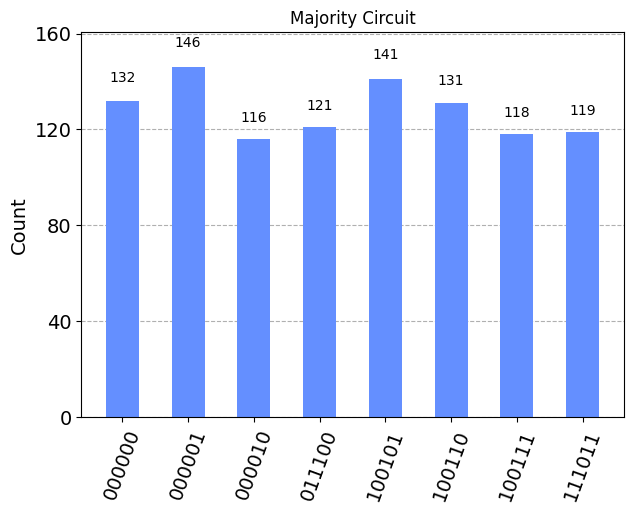

In [3]:
# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
circ = transpile(qc, simulator)

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Majority Circuit')

In [4]:
# Write the reading function
def read_write_oracle(file_path):
    # READ LLVM FILE
    num_qubits = 0
    qreg_name = []
    with open(file_path, 'r') as f:
        for line_num, line in enumerate(f):
            # Replace commas and parentheses with an empty string
            line = line.replace(',', '').replace('(', '').replace(')', '')
            words = line.split()
            if 'load' in words:
                if words[3] == '%Qubit*':
                    qreg_name.append(str(words[0]))
                    num_qubits = num_qubits + 1
                # Initialized qubit and remeber the sequence of initialization


    # WRITE QISKIT CIRCUT
    # Initialize the circuits
    num_cx_gates = 0
    num_ccx_gates = 0
    qreg_name.append('output')
    
    qc = QuantumCircuit(num_qubits+1)

    print('The number of qubits is: ' + str(num_qubits+1))
    print('The name of the qubit register is: ' + str(qreg_name))
    
    with open(file_path, 'r') as f:
        for line_num, line in enumerate(f):
            
            line = line.replace(',', '').replace(')', '')
            words = line.split()
            
            if '@Microsoft__Quantum__Intrinsic__CNOT__body(%Qubit*' in words:
                for q_index, qubit in enumerate(qreg_name): 
                    if str(qubit) == words[3]:
                        control_qubit_index = q_index
                    if str(qubit) == words[5]:
                        target_qubit_index = q_index
                    #Output qubit
                    if words[5][1]== 'o':
                        target_qubit_index = q_index
                qc.cx(control_qubit_index, target_qubit_index)
                num_cx_gates = num_cx_gates + 1


            if '@Microsoft__Quantum__Intrinsic__CCNOT__body(%Qubit*' in words:
                for q_index, qubit in enumerate(qreg_name):
                    if qubit == words[3]:
                        control_qubit_index1 = q_index
                    if qubit == words[5]:
                        control_qubit_index2 = q_index
                    if qubit == words[7]:
                        target_qubit_index = q_index
                    if words[5][1]== 'o':
                        target_qubit_index = q_index

                qc.ccx(control_qubit_index1, control_qubit_index2, target_qubit_index)
                num_ccx_gates = num_ccx_gates + 1
        
        print('The number of cx gates is: ' + str(num_cx_gates))
        print('The number of ccx gates is: ' + str(num_ccx_gates))
        return qc
       
qc = read_write_oracle('input.txt')
qc.draw()

The number of qubits is: 6
The name of the qubit register is: ['%a', '%b', '%c', '%5', '%8', 'output']
The number of cx gates is: 10
The number of ccx gates is: 2


┌───┐          ┌───┐          ┌───┐          ┌───┐     
q_0: ┤ X ├───────■──┤ X ├──────────┤ X ├───────■──┤ X ├─────
     └─┬─┘┌───┐  │  └─┬─┘┌───┐     └─┬─┘┌───┐  │  └─┬─┘┌───┐
q_1: ──┼──┤ X ├──■────┼──┤ X ├───────┼──┤ X ├──■────┼──┤ X ├
       │  └─┬─┘  │    │  └─┬─┘       │  └─┬─┘  │    │  └─┬─┘
q_2: ──■────■────┼────■────■────■────■────■────┼────■────■──
               ┌─┴─┐            │              │            
q_3: ──────────┤ X ├────────────┼────■─────────┼────────────
               └───┘            │    │       ┌─┴─┐          
q_4: ───────────────────────────┼────┼───────┤ X ├──────────
                              ┌─┴─┐┌─┴─┐     └───┘          
q_5: ─────────────────────────┤ X ├┤ X ├────────────────────
                              └───┘└───┘

Read the add integer function and build the circuit.

In [5]:
oracle = read_write_oracle('Int_input.txt')

The number of qubits is: 319
The name of the qubit register is: ['%3', '%6', '%9', '%12', '%15', '%18', '%21', '%24', '%27', '%30', '%33', '%36', '%39', '%42', '%45', '%48', '%51', '%54', '%57', '%60', '%63', '%66', '%69', '%72', '%75', '%78', '%81', '%84', '%87', '%90', '%93', '%96', '%99', '%102', '%105', '%108', '%111', '%114', '%117', '%120', '%123', '%126', '%129', '%132', '%135', '%138', '%141', '%144', '%147', '%150', '%153', '%156', '%159', '%162', '%165', '%168', '%171', '%174', '%177', '%180', '%183', '%186', '%189', '%192', '%196', '%199', '%202', '%205', '%208', '%211', '%214', '%217', '%220', '%223', '%226', '%229', '%232', '%235', '%238', '%241', '%244', '%247', '%250', '%253', '%256', '%259', '%262', '%265', '%268', '%271', '%274', '%277', '%280', '%283', '%286', '%289', '%292', '%295', '%298', '%301', '%304', '%307', '%310', '%313', '%316', '%319', '%322', '%325', '%328', '%331', '%334', '%337', '%340', '%343', '%346', '%349', '%352', '%355', '%358', '%361', '%364', '%3

In [10]:
qc = QuantumCircuit(319,192)
#qc.h([i for i in range( 1, 130 )])
qc.x(1)
qc.x(64)
qc.x(67)
qc.append(oracle, [i for i in range(319)])
# Measure qubits 0 to 191
for i in range(192):
    qc.measure(i, i)


In [11]:
# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
circ = transpile(qc, simulator)

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
print(counts)
#plot_histogram(counts, title='Integer Circuit')
#int_counts = {int(k, 2): v for k, v in counts.items()}
#plot_histogram(int_counts, title='Integer Circuit')

{'000000000000000000000000000000000000000000000000000000000000101100000000000000000000000000000000000000000000000000000000000010010000000000000000000000000000000000000000000000000000000000000010': 1024}


        Test 6
        0000000000000000000000000000000000000000000000000000000000001011 output registor 128-191
        0000000000000000000000000000000000000000000000000000000000001001 input registor 64-127
        0000000000000000000000000000000000000000000000000000000000000010 input registor 0-63
        
        Test5 (2 + 9 = 11) -correct 
        001000000000000000000000000000000000000000000000000000000000000
        0000000000000000000000000000000000000000000000000000000000000010
        0000000000000000000000000000000000000000000000000000000000001011 ouput
        0000000000000000000000000000000000000000000000000000000000001001 input
        0000000000000000000000000000000000000000000000000000000000000010 input
        
        Test5 (1 + 2 = 3) -correct 
        001000000000000000000000000000000000000000000000000000000000000
        0000000000000000000000000000000000000000000000000000000000000010
        0000000000000000000000000000000000000000000000000000000000000011 output
        0000000000000000000000000000000000000000000000000000000000000001 input
        0000000000000000000000000000000000000000000000000000000000000010 input

        Test4 (1 + 1 = 2) -correct 
        010000000000000000000000000000000000000000000000000000000000000
        0000000000000000000000000000000000000000000000000000000000000001
        0000000000000000000000000000000000000000000000000000000000000010 output
        0000000000000000000000000000000000000000000000000000000000000001 input
        0000000000000000000000000000000000000000000000000000000000000001 input
        
        Test1 (1+1 =2) -correct answer
        0000000000000000000000000000000000000000000000000000000000000000
        0000000000000000000000000000000000000000000000000000000000000000
        0000000000000000000000000000000000000000000000000000000000000010 output

        0000000000000000000000000000000000000000000000000000000000000001 input
        0000000000000000000000000000000000000000000000000000000000000001 input
        0                                                                -> un-used qubit (%a is a array here)

        Test2 (1 + 2 = 4) -wrong answer
        0100000000000000000000000000000000000000000000000000000000000000 axilary
        0000000000000000000000000000000000000000000000000000000000000010 axilary
        0000000000000000000000000000000000000000000000000000000000000100 output

        0000000000000000000000000000000000000000000000000000000000000010 input
        0000000000000000000000000000000000000000000000000000000000000001 input
        0                                                                -> un-used qubit (%a is a array here)

        Test3 (1 + 6 = 8) -wrong answer 
        0110000000000000000000000000000000000000000000000000000000000000 axilary
        0000000000000000000000000000000000000000000000000000000000000110 axilary
        0000000000000000000000000000000000000000000000000000000000001000 output
        0000000000000000000000000000000000000000000000000000000000000110 input
        0000000000000000000000000000000000000000000000000000000000000001 input
        0                                                                -> un-used qubit (%a is a array here)